In [28]:
import matplotlib.pyplot as plt

In [81]:
from ray.tune import Analysis
analysis = Analysis("data/tune/hyperparam_sweep2019_08_13-16_29_46")

/Users/micah/miniconda3/envs/hrc/lib/python3.7/site-packages/pandas-0.25.0-py3.7-macosx-10.7-x86_64.egg/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


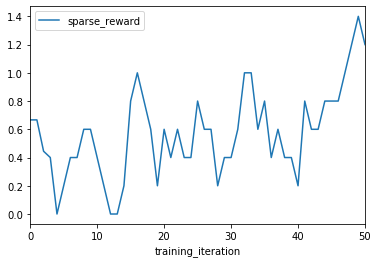

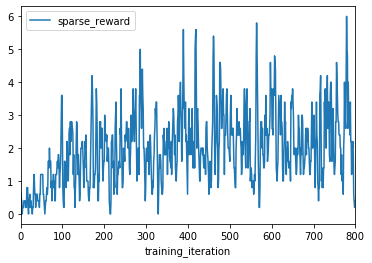

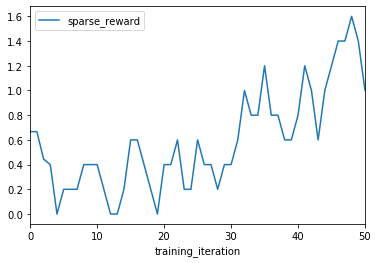

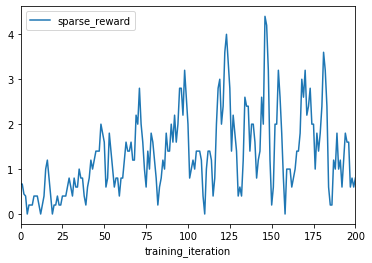

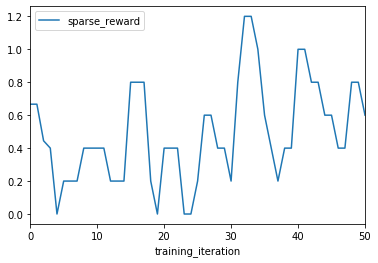

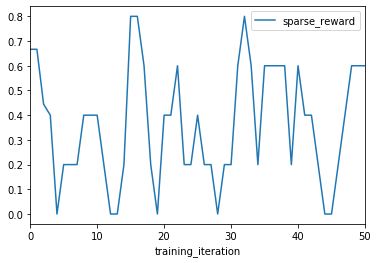

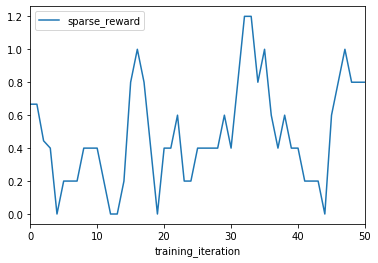

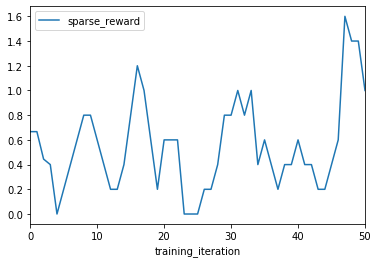

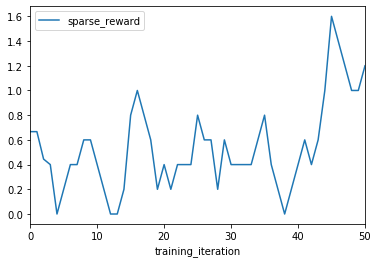

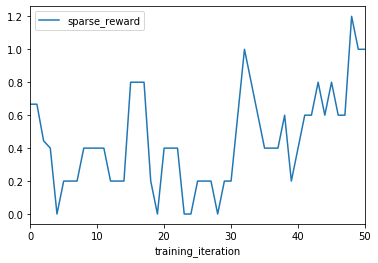

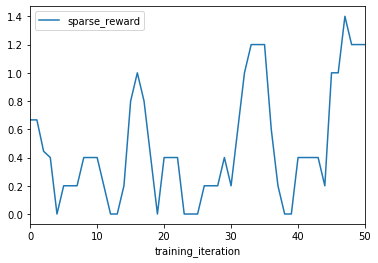

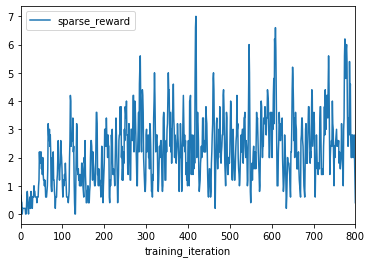

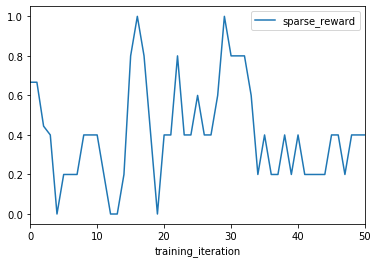

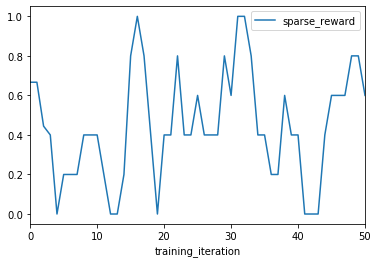

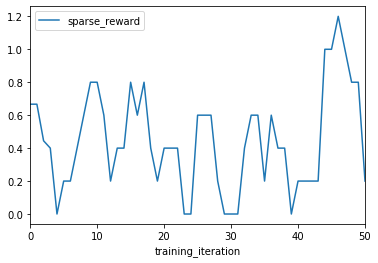

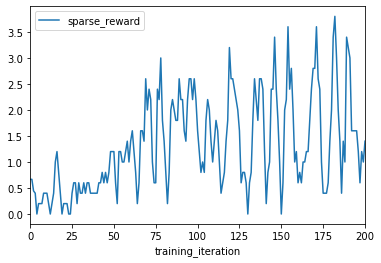

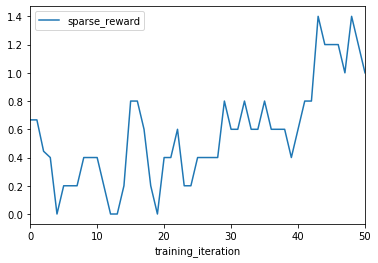

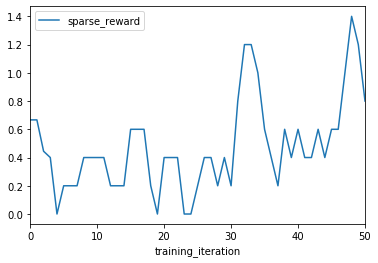

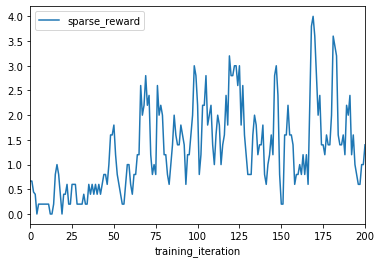

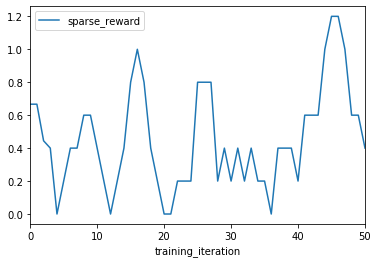

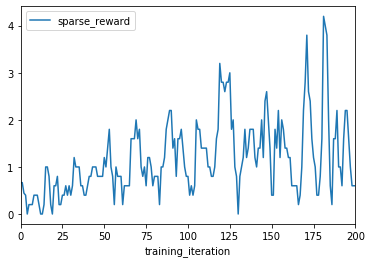

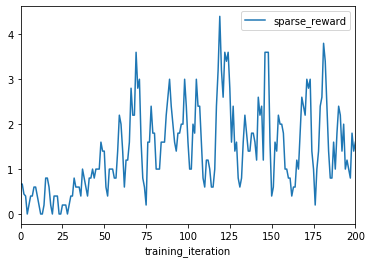

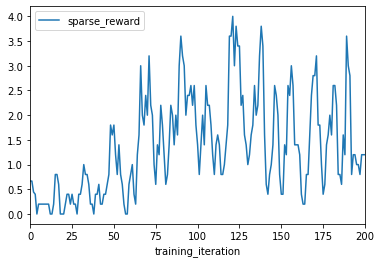

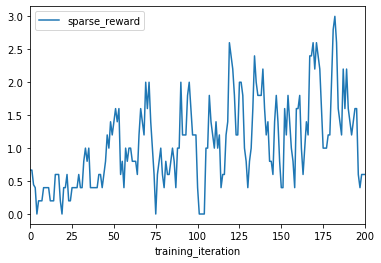

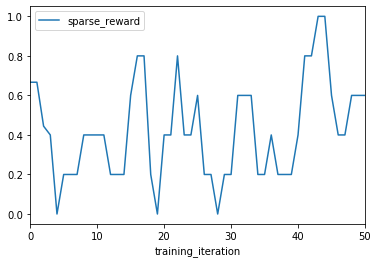

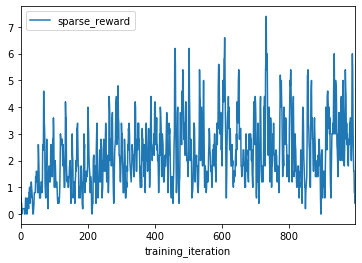

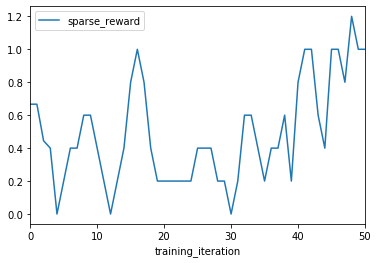

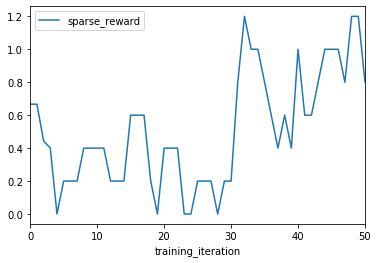

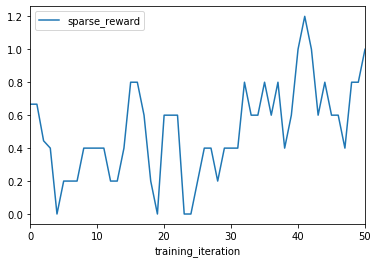

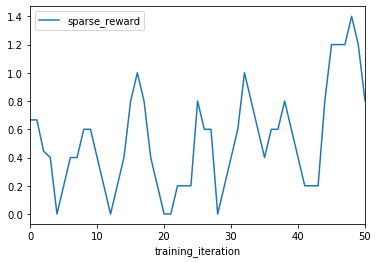

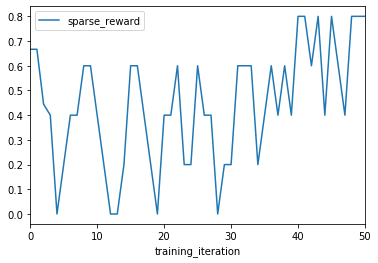

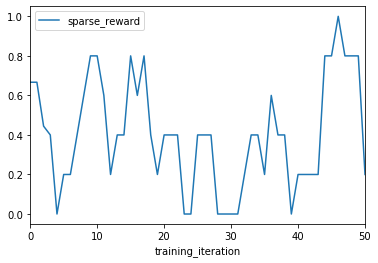

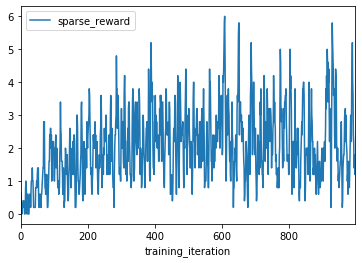

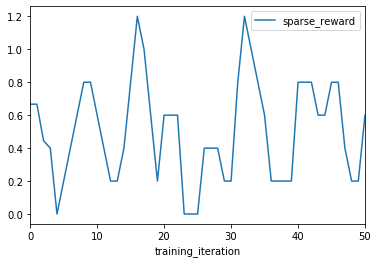

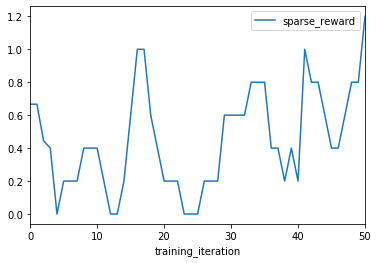

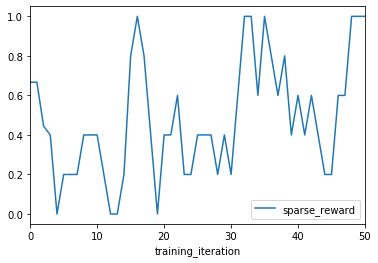

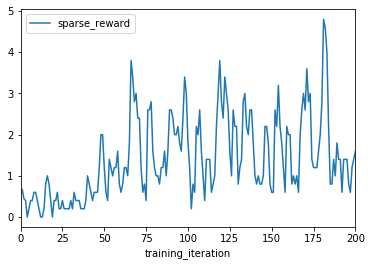

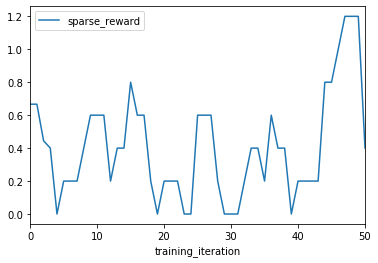

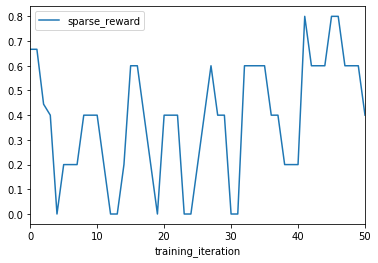

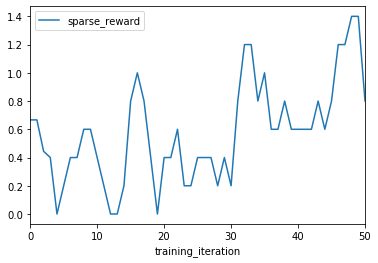

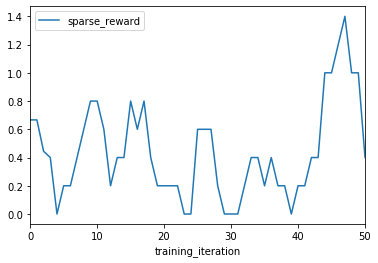

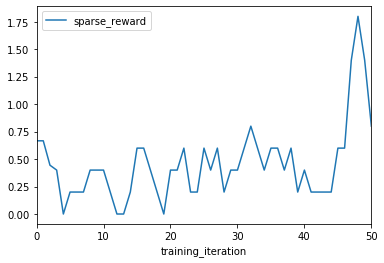

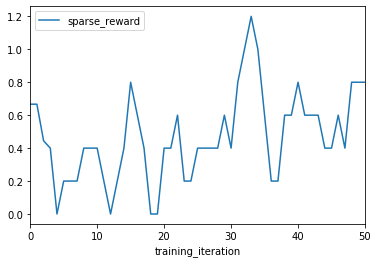

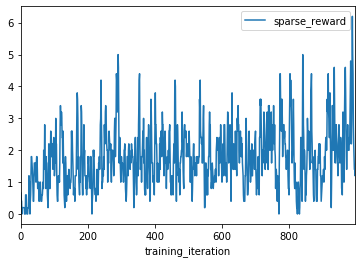

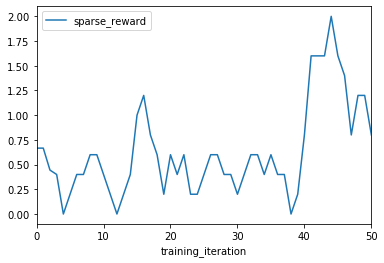

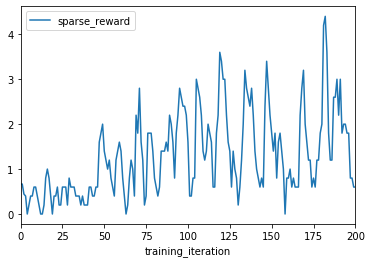

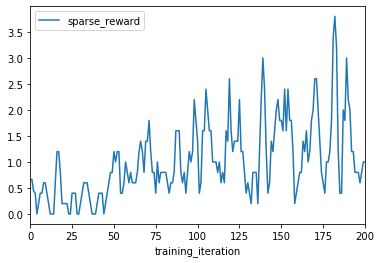

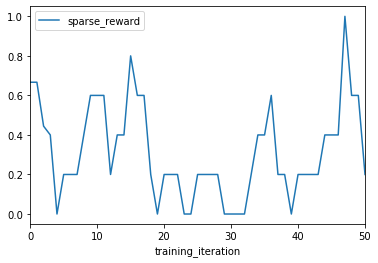

In [82]:
for trial_name, trial_df in analysis.trial_dataframes.items():
    t = trial_df
    t.plot(y="sparse_reward", x="training_iteration")

In [23]:
uniform_tune_params = [
    "LR", 
    "GAMMA", 
    "LAM",
    "MAX_GRAD_NORM",
    "CLIPPING"
]
hyperparams_cols = ["config:" + item for item in uniform_tune_params]
hyperparam_cols = [col for col in df if col.startswith('config') and col in hyperparams_cols]
hyperparam_cols

['config:CLIPPING',
 'config:GAMMA',
 'config:LAM',
 'config:LR',
 'config:MAX_GRAD_NORM']

In [83]:
df = analysis.dataframe(metric="sparse_reward", mode="max")
config_vs_reward_df = df.filter(hyperparam_cols + ['sparse_reward', 'dense_reward'])
config_vs_reward_df

,config:CLIPPING,config:GAMMA,config:LAM,config:LR,config:MAX_GRAD_NORM,sparse_reward,dense_reward
0,0.040734,0.988050,0.953227,0.000021,0.439991,1.4,6.67
1,0.018183,0.983396,0.981172,0.000021,0.977355,6.0,11.17
2,0.031308,0.954081,0.976980,0.000021,0.225679,1.6,7.14
3,0.078627,0.958762,0.987139,0.000021,0.634476,4.4,12.19
4,0.009657,0.989897,0.951648,0.000021,0.001462,1.2,4.97
5,0.027105,0.965084,0.984074,0.000021,0.431749,0.8,6.61
6,0.099470,0.963612,0.993537,0.000021,0.406503,1.2,4.97
7,0.061175,0.987622,0.995884,0.000021,0.792959,1.6,6.44
8,0.048686,0.987151,0.966825,0.000021,0.186579,1.6,6.62
9,0.009383,0.956669,0.964722,0.000021,0.142463,1.2,6.37


[('config:CLIPPING', 'config:GAMMA'),
 ('config:CLIPPING', 'config:LAM'),
 ('config:CLIPPING', 'config:LR'),
 ('config:CLIPPING', 'config:MAX_GRAD_NORM'),
 ('config:GAMMA', 'config:LAM'),
 ('config:GAMMA', 'config:LR'),
 ('config:GAMMA', 'config:MAX_GRAD_NORM'),
 ('config:LAM', 'config:LR'),
 ('config:LAM', 'config:MAX_GRAD_NORM'),
 ('config:LR', 'config:MAX_GRAD_NORM')]

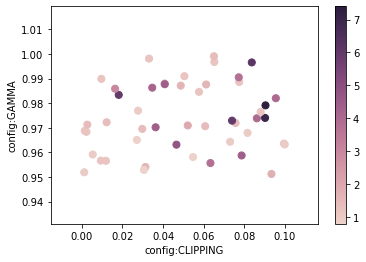

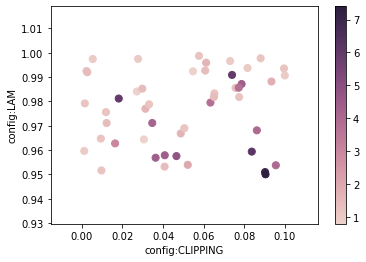

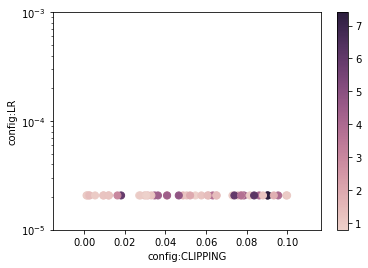

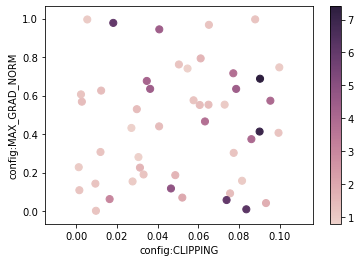

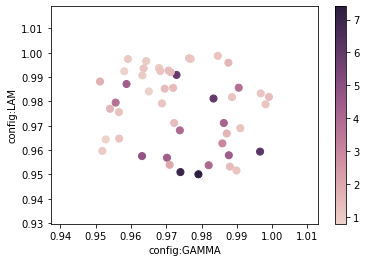

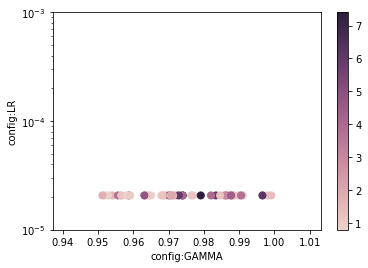

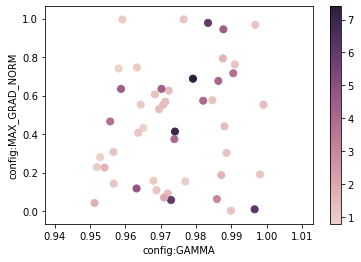

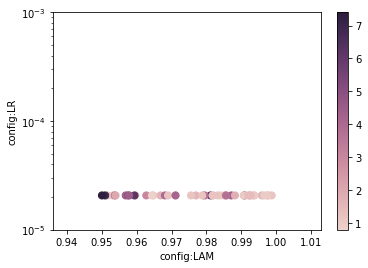

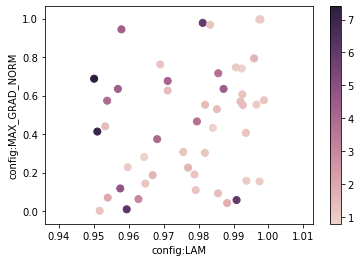

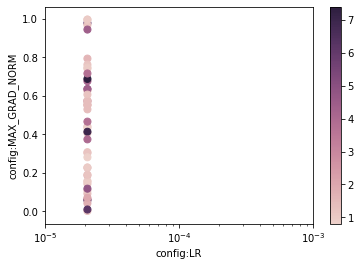

In [85]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

log_scale = ["config:LR"]

for x_name, y_name in itertools.combinations(hyperparam_cols, 2):
    

    x, y, z = config_vs_reward_df[x_name], config_vs_reward_df[y_name], config_vs_reward_df['sparse_reward']
    
    cmap = sns.cubehelix_palette(as_cmap=True)
    
    f, ax = plt.subplots()
    points = ax.scatter(x, y, c=z, s=50, cmap=cmap)
    f.colorbar(points)
    
    if x_name in log_scale:
        plt.xscale('log')
        ax.set_xlim((1e-5, 1e-3))
    
    if y_name in log_scale:
        plt.yscale('log')
        ax.set_ylim((1e-5, 1e-3))
    
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    

    plt.show()

1.00001

In [78]:
def loguniform(low=0, high=1, size=None):
    return np.exp(np.random.uniform(np.log(low), np.log(high), size))

In [79]:
loguniform(1e-5, 1e-3)

0.00012190681514866994

(array([1064., 1006.,  974.,  978., 1007., 1006., 1003.,  948.,  969.,
        1045.]), array([-11.51249705, -10.89116445, -10.26983186,  -9.64849927,
         -9.02716667,  -8.40583408,  -7.78450148,  -7.16316889,
         -6.5418363 ,  -5.9205037 ,  -5.29917111]), <a list of 10 Patch objects>)

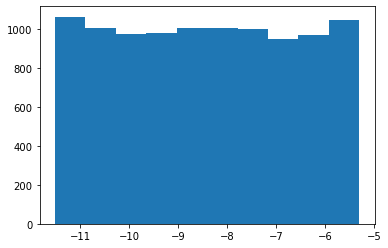

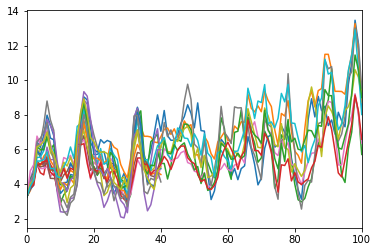

In [8]:
[d.dense_reward.plot() for d in analysis.trial_dataframes.values()]

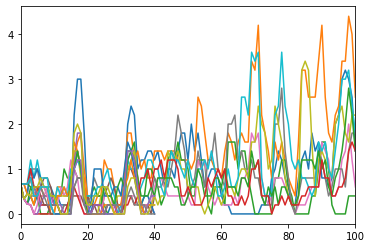

In [9]:
[d.sparse_reward.plot() for d in analysis.trial_dataframes.values()]

In [10]:
df = analysis.dataframe(metric="sparse_reward", mode="max")
df

,sparse_reward,dense_reward,trial_id,training_iteration,time_this_iter_s,done,timesteps_total,episodes_total,experiment_id,date,...,config:LAM,config:LOCAL_TESTING,config:LR,config:MAX_GRAD_NORM,config:OTHER_AGENT_TYPE,config:PPO_RUN_TOT_TIMESTEPS,config:REW_SHAPING_HORIZON,config:layout_name,config:mdp_generation_params,logdir
0,3.200000,10.990000,bcdbeb77,97,5.192365,False,NaN,NaN,54b7ae4b94d04d4ab5dfa135d83eb152,2019-08-12_20-02-08,...,0.995188,False,0.004012,0.500175,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...
1,4.400000,13.280000,bcdbeb72,98,4.883483,False,NaN,NaN,a7856d6cf4f0423e8eb8e64c0f77be34,2019-08-12_19-45-58,...,0.962684,False,0.000099,0.180574,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...
2,1.600000,8.230000,bcdbeb6b,34,4.848525,False,NaN,NaN,1521ebb440934d32a9f54ab5734ce1bb,2019-08-12_19-27-01,...,0.953396,False,0.004434,0.108227,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...
3,0.666667,3.266667,bcdbeb6c,0,16.062005,False,NaN,NaN,10d25ee7a0364978b573d073b516aad7,2019-08-12_19-30-51,...,0.952423,False,0.002506,0.725525,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...
4,1.800000,8.880000,bcdbeb66,17,4.783465,False,NaN,NaN,cd5e29511bdd4ea69830ab0354816148,2019-08-12_19-10-06,...,0.956022,False,0.003321,0.490310,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...
5,1.000000,5.120000,bcdbeb6d,32,5.048109,False,NaN,NaN,02e366a07c7c43bfb1d28f6cca1dc9ae,2019-08-12_19-34-44,...,0.984836,False,0.003030,0.954135,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...
6,2.000000,9.220000,bcdbeb6a,98,4.863689,False,NaN,NaN,fefeb37c65124070a5d084342729f3a8,2019-08-12_19-30-22,...,0.960185,False,0.002796,0.962150,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...
7,2.800000,10.380000,bcdbeb64,78,4.864505,False,NaN,NaN,a0be63f8153b435296a5ffc4744105df,2019-08-12_19-11-35,...,0.965106,False,0.001025,0.110618,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...
8,3.400000,9.610000,bcdbeb68,85,4.997366,False,NaN,NaN,56162f75113b43bcb1c214919e8b699f,2019-08-12_19-20-45,...,0.984482,False,0.000848,0.053443,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...
9,3.600000,8.800000,bcdbeb76,69,4.833080,False,NaN,NaN,66c75a0160e04e148a4c0811839ad2d7,2019-08-12_19-52-04,...,0.977024,False,0.000179,0.618762,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...


In [80]:
from overcooked_ai_py.utils import load_pickle, save_pickle

from human_aware_rl.utils import reset_tf
from human_aware_rl.ppo.ppo import ex as ex_ppo
from human_aware_rl.imitation.behavioural_cloning import get_bc_agent_from_saved
from human_aware_rl.experiments.bc_experiments import BEST_BC_MODELS_PATH

import time
import numpy as np
from ray import tune

def fun(lr, grl=1):
    def boi(t):
        return lr * 10 + 0.1 * t + grl
    return boi

def train_ppo(config):
    optimizer = fun(lr=config["lr"])
    for i in range(3):
        time.sleep(np.random.uniform(0, 3))
        acc = optimizer(i)
        tune.track.log(sparse_reward=acc, timesteps_total=i, episodes_total=0)

# def train_ppo(config):
#     from human_aware_rl.ppo.ppo import ex as ex_ppo, ppo_run, my_config
#     lr = config["lr"]
#     seed = np.random.randint(0, 10000)
#     run = ex_ppo.run(config_updates={'LOCAL_TESTING': True, 'layout_name': 'simple', 'OTHER_AGENT_TYPE': 'sp', 'LR': lr, 'TRACK_TUNE':True, 'SEEDS':[seed]})
#     train_info = run.result[0]

# def train_ppo(config):
#     lr = config["lr"]
#     params = my_config()
#     params["LR"] = lr
#     params["OTHER_AGENT_TYPE"] = "sp"
#     params["TRACK_TUNE"] = True
#     ok = ppo_run(params)
#     train_info = ok[0]

def loguniform(low=0, high=1, size=None):
    return np.exp(np.random.uniform(np.log(low), np.log(high), size))

search_space = {
    "lr": tune.sample_from(lambda spec: loguniform(1e-5, 1e-3))
}

analysis = tune.run(
    train_ppo, 
    name="example",
    config=search_space,
    scheduler=tune.schedulers.AsyncHyperBandScheduler(metric="sparse_reward", grace_period=10, mode="max"),
    num_samples=3
)

2019-08-13 16:01:11,641	INFO function_runner.py:249 -- tune.track signature detected.
2019-08-13 16:01:11,646	INFO trial_runner.py:176 -- Starting a new experiment.


== Status ==
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 40.000: None | Iter 10.000: None
Resources requested: 0/8 CPUs, 0/0 GPUs
Memory usage on this node: 8.3/17.2 GB

== Status ==
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 40.000: None | Iter 10.000: None
Resources requested: 1/8 CPUs, 0/0 GPUs
Memory usage on this node: 8.3/17.2 GB
Result logdir: /Users/micah/ray_results/example
Number of trials: 3 ({'RUNNING': 1, 'PENDING': 2})
PENDING trials:
 - train_ppo_1_lr=0.00066716:	PENDING
 - train_ppo_2_lr=3.5341e-05:	PENDING
RUNNING trials:
 - train_ppo_0_lr=0.00036561:	RUNNING

Result for train_ppo_2_lr=3.5341e-05:
  date: 2019-08-13_16-01-12
  done: false
  episodes_total: 0
  experiment_id: fec2df95c6f348e6810507e1efe08230
  hostname: Micahs-MacBook-Pro.local
  iterations_since_restore: 1
  node_ip: 10.142.37.199
  pid: 4373
  sparse_reward: 1.0003534100564824
  time_since_restore: 0.1427919864654541
  time_this_iter_s: 0.1427919864654541
  time_total_s: 0.142791986465454

In [3]:
df = analysis.dataframe(metric="sparse_reward", mode="max")
df

2019-08-13 11:56:38,781	WARNING experiment_analysis.py:79 -- Couldn't read config from 2 paths


,sparse_reward,timesteps_total,episodes_total,trial_id,training_iteration,time_this_iter_s,done,experiment_id,date,timestamp,time_total_s,pid,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,config:lr,logdir
0,1.205214,2,0,0ceadee8,2,0.984424,False,2e2d9566c5b849f0bb95124bd3f465b0,2019-08-13_11-56-31,1565722591,4.700129,26380,Micahs-MacBook-Pro.local,10.142.37.199,4.700129,0,3,0.000521,/Users/micah/ray_results/example/train_ppo_0_l...


In [4]:
print("Best config: ", analysis.get_best_config(metric="sparse_reward", mode="max"))
print("Best config: ", analysis.get_best_config(metric="dense_reward", mode="max"))

Best config:  {'lr': 0.00014073910418733337}
Best config:  {'lr': 0.0007928602381550028}


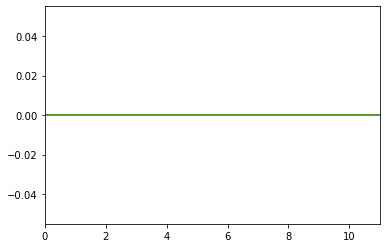

In [5]:
[d.sparse_reward.plot() for d in analysis.trial_dataframes.values()]

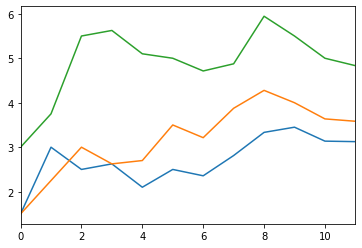

In [6]:
[d.dense_reward.plot() for d in analysis.trial_dataframes.values()]